## Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order to avoid overfitting (“curse of dimensionality”) and also reduce computational costs. 

5 general steps for LDA:
1. Compute the d-dimensional mean vectors for the different classes from the dataset.
2. Compute the scatter matrices (in-between-class and within-class scatter matrix).
3. Compute the eigenvectors (ee1,ee2,...,eed) and corresponding eigenvalues (λλ1,λλ2,...,λλd) for the scatter matrices.
4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix WW (where every column represents an eigenvector).
5. Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: YY=XX×WW (where XX is a n×d-dimensional matrix representing the n samples, and yy are the transformed n×k-dimensional samples in the new subspace).

### Objective
Objective function is:
$$J(w) = \frac{w^T S_{b} w}{w^T S_{w} w}$$
where, $S_{b} \epsilon R^{dxd}$ and $S_{w} \epsilon R^{dxd}$ are the between-class and within-class covariance matrices respectively. They are calculated as
$$ S_b = \sum_{k=1}^K (m_k - m) N_k (m_k -m)^T $$
$$ S_w = \sum_{k=1}^K \sum_{n=1}^{N_k} (X_{nk} - m_k)(X_{nk} - m_k)^T$$
where $X_{nk}$ is the $n^{th}$ data example in the $k^{th}$ class, $N_k$ is the number of examples in class k, m is the overall mean of the entire data and $m_k$ is the mean of the $k^{th}$ class.

In [1]:
feature_dict = {i:label for i,label in zip(range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

In [10]:
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# Changing class labels to encodings
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,0:4].values
y = df['class label'].values

encoder = LabelEncoder()
label_encoder = encoder.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

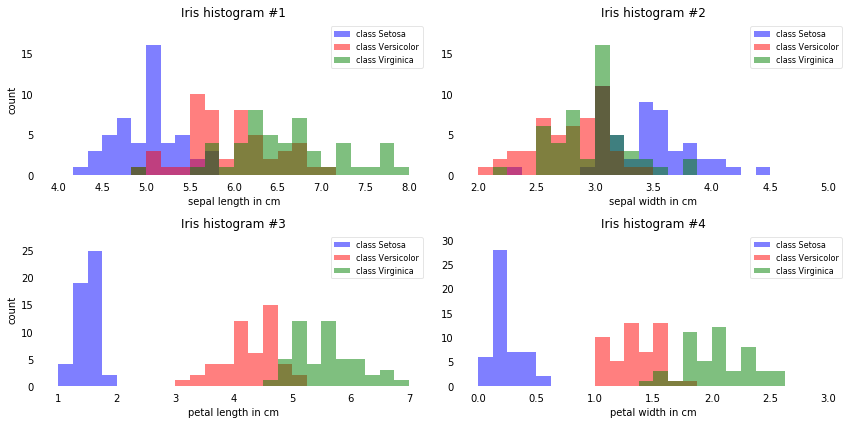

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom=False, top=False,  
            labelbottom=True, left=False, right=False, labelleft=True)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

In [19]:
# Step 1 - Computing the mean vectors
np.set_printoptions(precision=3)
mean_vectors = []
for cls in range(1,4):
    mean_vectors.append(np.mean(X[y==cls], axis=0))
    print("Mean Vector class {}: {}".format(cls, mean_vectors[cls-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]
Mean Vector class 2: [5.936 2.77  4.26  1.326]
Mean Vector class 3: [6.588 2.974 5.552 2.026]


In [25]:
# Step 2 - Computing scatter matrices
# Within class
S_W = np.zeros((4,4))
for cls, m in zip(range(1,4), mean_vectors):
#     Scatter matrix for every class
    class_sc_mat = np.zeros((4,4))
    for row in X[y==cls]:
        row, m = row.reshape(4,1), m.reshape(4,1) #column vectors
        class_sc_mat += (row - m).dot((row - m).T)
    S_W += class_sc_mat
print("Within-class Scatter Matrix: \n", S_W)

# Between class
overall_mean = np.mean(X, axis=0)
S_B = np.zeros((4,4))
for i, mean_vec in enumerate(mean_vectors):
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print("Between-class Scatter Matrix: \n", S_B)

Within-class Scatter Matrix: 
 [[38.956 13.683 24.614  5.656]
 [13.683 17.035  8.12   4.913]
 [24.614  8.12  27.22   6.254]
 [ 5.656  4.913  6.254  6.176]]
Between-class Scatter Matrix: 
 [[ 63.212 -19.534 165.165  71.363]
 [-19.534  10.978 -56.055 -22.492]
 [165.165 -56.055 436.644 186.908]
 [ 71.363 -22.492 186.908  80.604]]


In [26]:
# Step 3 - Solving the generalized eigenvalue problem for the matrix S^−1_WS_B
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.205]
 [ 0.387]
 [-0.546]
 [-0.714]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.009]
 [-0.589]
 [ 0.254]
 [-0.767]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[-0.838]
 [ 0.17 ]
 [ 0.123]
 [ 0.504]]
Eigenvalue 3: -4.13e-15

Eigenvector 4: 
[[ 0.2  ]
 [-0.395]
 [-0.457]
 [ 0.772]]
Eigenvalue 4: 1.20e-14


In [34]:
# Step 4: Selecting linear discriminants for the new feature subspace
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigen values in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

# If we take a look at the eigenvalues, we can already see that 2 eigenvalues are close to 0. The reason why these are close to 0 is not that they are not informative but it’s due to floating-point imprecision. In fact, these two last eigenvalues should be exactly zero: In LDA, the number of linear discriminants is at most c−1 where c is the number of class labels, since the in-between scatter matrix SB is the sum of c matrices with rank 1 or less.
print('\nVariance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

# Choosing k eigenvectors now - since only 2 giving information, k=2 from d=4
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('\nMatrix W:\n', W.real)

Eigen values in decreasing order:

32.27195779972981
0.27756686384004264
1.1953730364935478e-14
4.1311796919088535e-15

Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%

Matrix W:
 [[ 0.205 -0.009]
 [ 0.387 -0.589]
 [-0.546  0.254]
 [-0.714 -0.767]]


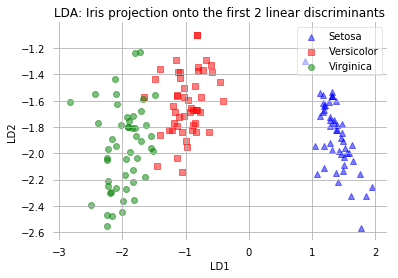

In [37]:
# Step 5: Transforming the samples onto the new subspace
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):
        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom=False, top=False,  
            labelbottom=True, left=False, right=False, labelleft=True)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()